# Lab 2

In [82]:
#Import modules
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Task 1 - Check for null and nan values

In [83]:
df = pd.read_csv(r'C:\Users\solve\Downloads\Titanic.csv', sep=',')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [84]:
df.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [85]:
medianAge = df["Age"].median(skipna=True) # Regner medianen, skipna = hopper over NaN verdier.
print(medianAge)
meanAge = df["Age"].mean(skipna=True)
print(meanAge)

28.0
29.881137667304014


In [86]:
df["Age"] = df["Age"].fillna(df["Age"].median()) # Erstatter NaN med meadianen 28 år.
df["Fare"] = df["Fare"].fillna(df["Fare"].median()) # Erstatter NaN med median på Fare(billettpriser)
df.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
dtype: int64

In [87]:
print('Percent missing in"Cabin" column: %.2f%%' %((df['Cabin'].isnull().sum()/df.shape[0])*100)) 

Percent missing in"Cabin" column: 77.46%


In [88]:
df['HasCabin'] = ~df.Cabin.isnull() # Ny kolonne med bool, True der verdien IKKE er null. False der det er Nan.
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False


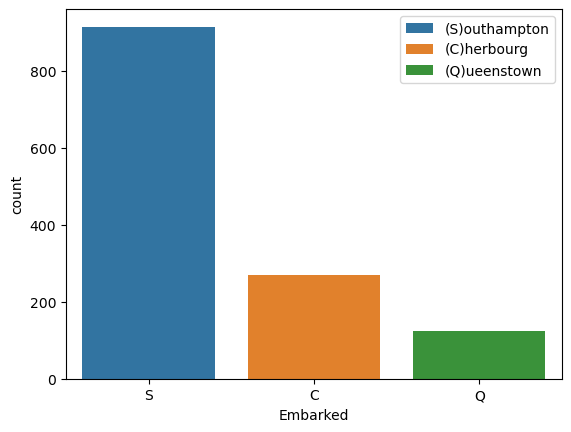

In [89]:
# C = Cherbourg, Q = Queenstown, S = Southampton
sns.countplot(x='Embarked', data=df, hue='Embarked')
# set legend to C = Cherbourg, Q = Queenstown, S = Southampton
plt.legend(['(S)outhampton', '(C)herbourg', '(Q)ueenstown'])
plt.show()

In [90]:
df["Embarked"] = df["Embarked"].fillna("S") 
# Erstatter NaN med S, som er det mest brukte.


# Task 2 - Adding a feature

In [91]:
# Lager en ny kolonne med tittel. Ekstraherer tittel fra navnet.

df["Title"] = df.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1)) 
df["Title"].value_counts()

Title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

In [92]:
# Erstatter Mlle, Ms, Mme med Miss og Mr:
df["Title"] = df["Title"].replace({'Mlle':'Miss', 'Ms':'Miss','Mme':'Mr'})
# Samler de det er få av i en undergruppe:
df["Title"] = df["Title"].replace(["Rev","Dr","Col","Major","Don","Lady","Sir","Capt","Countess","Jonkheer","Dona"], "Unique")
df["Title"].value_counts()

Title
Mr        758
Miss      264
Mrs       197
Master     61
Unique     29
Name: count, dtype: int64

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Mr'),
  Text(1, 0, 'Mrs'),
  Text(2, 0, 'Miss'),
  Text(3, 0, 'Master'),
  Text(4, 0, 'Unique')])

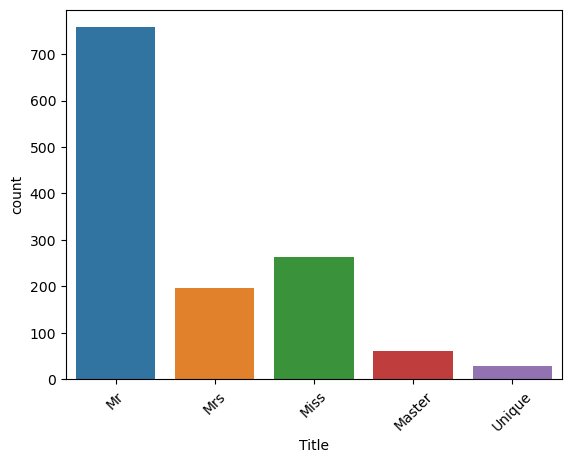

In [93]:

sns.countplot(x='Title', data=df, hue='Title') #Seaborn countplot
plt.xticks(rotation=45)

# Task 3 - Convert Age and Fare into categorical data

In [94]:
# Deler inn i kategoriske data. Aka intervaller som data faller innenfor. 
# q=4 deler inn i 4 like store intevaller. Foresk prisnivå eller aldersgruppe.
df['CatAge'] = pd.qcut(df["Age"], q=4, labels=False)
df['CatFare'] = pd.qcut(df["Fare"], q=4, labels=False)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin,Title,CatAge,CatFare
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,Mr,0,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,Mrs,3,3
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,Miss,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True,Mrs,2,3
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,Mr,2,1


# Task 4 - Convert dataframe to binary data

In [95]:
df = df.drop(["Age", "Fare", "Cabin", "Name", "Ticket"], axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,HasCabin,Title,CatAge,CatFare
0,1,0.0,3,male,1,0,S,False,Mr,0,0
1,2,1.0,1,female,1,0,C,True,Mrs,3,3
2,3,1.0,3,female,0,0,S,False,Miss,1,1
3,4,1.0,1,female,1,0,S,True,Mrs,2,3
4,5,0.0,3,male,0,0,S,False,Mr,2,1


In [96]:
df_dum = pd.get_dummies(df, drop_first=True)
df_dum.head()

,PassengerId,Survived,Pclass,SibSp,Parch,HasCabin,CatAge,CatFare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Unique
0,1,0.0,3,1,0,False,0,0,True,False,True,False,True,False,False
1,2,1.0,1,1,0,True,3,3,False,False,False,False,False,True,False
2,3,1.0,3,0,0,False,1,1,False,False,True,True,False,False,False
3,4,1.0,1,1,0,True,2,3,False,False,True,False,False,True,False
4,5,0.0,3,0,0,False,2,1,True,False,True,False,True,False,False


In [97]:
# Lagrer det bearbeidet datasettet:
df_dum.to_csv(r'C:\Users\solve\Titanic_Cleaned.csv', index=False)